R2 Score: 0.4526027629719195
Mean Squared Error: 2900.1936284934814
Mean Absolute Error: 42.79409467959994
Intercept: 151.34560453985995
Explained Variance Score: 0.4554925102890146


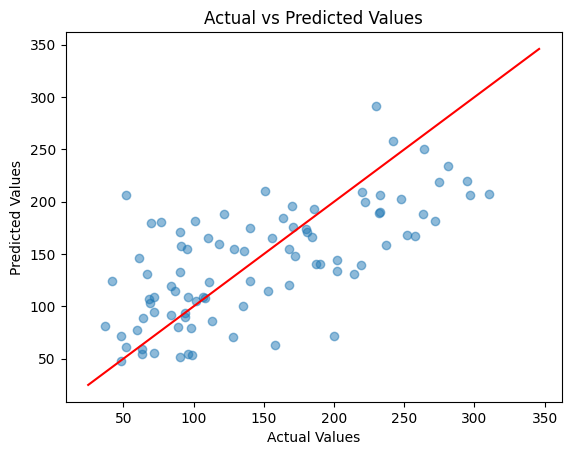

In [3]:
### Use a standard-library implementation as a validator

import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, explained_variance_score
import matplotlib.pyplot as plt

diabetes = load_diabetes()
diabetes_data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# 'target' = diabetes progression 1 year from now
diabetes_data['target'] = diabetes.target

diabetes_data.head()

X = diabetes_data.drop('target', axis=1)
y = diabetes_data['target']
X.shape, y.shape


# we want to train the model to map first 353 samples (80%) to corresponding targets, then predict the target values for the remaining 89 samples (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

model = LinearRegression()
model.fit(X_train, y_train, sample_weight=None) # fit finds the best-fitting line that minimizes the sum of squared residuals
predicted = model.predict(X_test) # predict the target values for the remaining 89 samples

# Evaluate the model
r2 = r2_score(y_test, predicted) # compares the model's predictions to the mean of the target values
mse = mean_squared_error(y_test, predicted) # measures the average of the squares of the errors
evs = explained_variance_score(y_test, predicted) # measures the extent to which a mathematical model accounts for the variation of a given data set
mae = mean_absolute_error(y_test, predicted) # measures the average of the absolute errors
intercept = model.intercept_ # the point where the line crosses the y-axis

# Print all
print(f"R2 Score: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Intercept: {intercept}")
print(f"Explained Variance Score: {evs}")

# Plot the predicted target values (x-axis) against the actual values (y-axis)
# If the model is a good fit, the points should be close to the line y=x, indicating a strong linear relationship
plt.scatter(y_test, predicted, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

Predicted: [0.1 0.2 0.3 0.4 0.5]
Actual: [ 3  6  9 12 15]


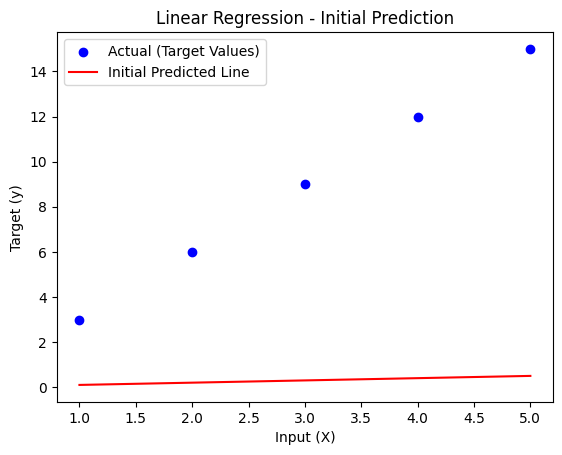

Predicted: [0.1 0.2 0.3 0.4 0.5]
Actual: [ 3  6  9 12 15]
Residuals: [ 2.9  5.8  8.7 11.6 14.5]
Squared residuals: [  8.41  33.64  75.69 134.56 210.25]
Mean Squared Error: 92.50999999999999
Weight: 0.738
Bias: 0.17400000000000002
Weight Gradient: -63.800000000000004
Bias Gradient: -17.400000000000002
Mean Squared Error - Calculus-y version: 92.50999999999999
My Weight: 0.738
My Bias: 0.174
My Weight Gradient: -63.8
My Bias Gradient: -17.4
Final Weight: 2.8527272732328273
Final Bias: 0.5317012729929672


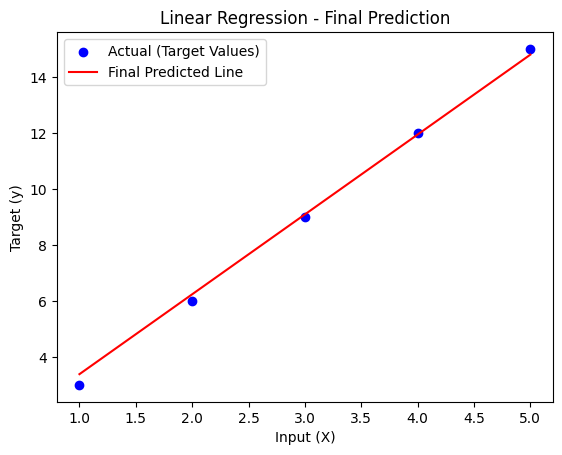

In [4]:
### Implement LR from scratch
### https://www.youtube.com/watch?v=VmbA0pi2cRQ&t=1s&ab_channel=NeuralNine
### https://www.youtube.com/watch?v=sDv4f4s2SB8&ab_channel=StatQuestwithJoshStarmer
### https://www.youtube.com/watch?v=I876Sb5xrws&ab_channel=StarfishMaths

import numpy as np

X = np.array([1, 2, 3, 4, 5]) # input, dependent variable
y = np.array([3, 6, 9, 12, 15]) # target, independent variable

# With linear regression our goal is to find a line that best fits the data
# This means we can use the line to predict the target independent variable for a given value of X
# The equation of the line is given by y = wX + b, where w is the weight (slope) and b is the bias (intercept)

# Let's just do one iteration first
w = 0.1
b = 0.0
learning_rate = 0.01 # learning rate (come back to this)
iterations = 100
n = len(X) # number of samples

y_predicted = w * X + b
print(f'Predicted: {y_predicted}') # [0.1 0.2 0.3 0.4 0.5]
print(f'Actual: {y}') # [ 3  6  9 12 15]

# Clearly this line predicts the target values poorly - they are way off
# So, we need to adjust our line! Which means we need to adjust our weight and bias (slope and intercept)
plt.scatter(X, y, color='blue', label='Actual (Target Values)')
plt.plot(X, y_predicted, color='red', label='Initial Predicted Line')
plt.xlabel('Input (X)')
plt.ylabel('Target (y)')
plt.title('Linear Regression - Initial Prediction')
plt.legend()
plt.show()

# Calculate the mean squared error between y_predicted and y
# This is our cost function - we want to minimize this
# mse = [ (3-0.1)^2 + (6-0.2)^2 + (9-0.3)^2 + (12-0.4)^2 + (15-0.5)^2 ] / 5
residuals = y - y_predicted
mse = np.mean(residuals ** 2)

print(f'Predicted: {y_predicted}') # [0.1 0.2 0.3 0.4 0.5]
print(f'Actual: {y}') # [ 3  6  9 12 15]
print(f'Residuals: {residuals}') # [ 2.9  5.8  8.7 11.6 14.5]
print(f'Squared residuals: {residuals**2}') # [  8.41  33.64  75.69 134.56 210.25]
print(f'Mean Squared Error: {mse}') # 92.509

# OK, we have our cost function, but how do we minimize it?
# We can use gradient descent to iteratively move towards the minimum

# (here is a more Pythonic version from ChatGPT - can use it to validate the "calculus-y" code below;
# but generally in these implementations, I want to avoid numpy magic and code the math myself)
w_grad_check = (2 / X.shape[0]) * np.dot(X.T, (y_predicted - y))
b_grad_check = (2 / X.shape[0]) * np.sum(y_predicted - y)
w_check = w - (learning_rate * w_grad_check)
b_check = b - (learning_rate * b_grad_check)

print(f'Weight: {w_check}')
print(f'Bias: {b_check}')
print(f'Weight Gradient: {w_grad_check}')
print(f'Bias Gradient: {b_grad_check}')

# Let's do gradient descent but for only one parameter (b) for now
# If we were to plot our cost function (mean squared residuals) against b (intercept), we would see a quadratic curve
# We want to descend "down" this curve to the global minima, where the cost is lowest
# To do this, we need to, for each intercept value, compute the derivative (slope) of the curve at that point
# Then we can subtract this derivative from the current intercept b to get the new intercept
# So we want the derivative of the cost function with respect to b
# MSE = (1/n) * sum((y - y_predicted)^2) = (1/n) * sum(residuals^2)
# Let's first change the calculation of MSE so we can reflect here the calculus
MSE = (1/n) * np.sum((y-(w*X+b))**2)
print(f'Mean Squared Error - Calculus-y version: {mse}') # 92.509

# Compute partial derivatives of MSE (cost function) with respect to b
outer_derivative_b = 2*(y-(w*X+b)) # derivative of `(y - wX - b)^2`
inner_derivative_b = -1 # derivative of `y - wX - b` (wrt b)
gradient_b_components = outer_derivative_b * inner_derivative_b # chain rule
gradient_b = np.mean(gradient_b_components)

# Now we can do the same with respect to w
outer_derivative_w = 2*(y-(w*X+b))
inner_derivative_w = -X # # derivative of `y - Xw - b` (wrt w)
gradient_w_components = outer_derivative_w * inner_derivative_w # chain rule
gradient_w = np.mean(gradient_w_components)

# Now we can update our values of w and b
w = w - (learning_rate * gradient_w)
b = b - (learning_rate * gradient_b)

print(f'My Weight: {w}')
print(f'My Bias: {b}')
print(f'My Weight Gradient: {gradient_w}')
print(f'My Bias Gradient: {gradient_b}')

# Now we can put this all together in a loop and descend iteratively towards the minimum
w = 0.1
b = 0.0
learning_rate = 0.01
iterations = 100
n = len(X)

for i in range(iterations):
    # Calculate the mean squared error between y_predicted and y
    MSE = (1/n) * np.sum((y-(w*X+b))**2)

    # Compute partial derivatives of MSE (cost function) with respect to b
    outer_derivative_b = 2*(y-(w*X+b)) # derivative of `(y - wX - b)^2`
    inner_derivative_b = -1 # derivative of `y - wX - b` (wrt b)
    gradient_b_components = outer_derivative_b * inner_derivative_b # chain rule
    gradient_b = np.mean(gradient_b_components)

    # Now we can do the same with respect to w
    outer_derivative_w = 2*(y-(w*X+b))
    inner_derivative_w = -X # # derivative of `y - Xw - b` (wrt w)
    gradient_w_components = outer_derivative_w * inner_derivative_w # chain rule
    gradient_w = np.mean(gradient_w_components)

    w = w - (learning_rate * gradient_w)
    b = b - (learning_rate * gradient_b)

# Print the final values of w and b
print(f'Final Weight: {w}')
print(f'Final Bias: {b}')

# Plot the final line
y_predicted = w * X + b
plt.scatter(X, y, color='blue', label='Actual (Target Values)')
plt.plot(X, y_predicted, color='red', label='Final Predicted Line')
plt.xlabel('Input (X)')
plt.ylabel('Target (y)')
plt.title('Linear Regression - Final Prediction')
plt.legend()
plt.show()


Mean Squared Error: 99.0


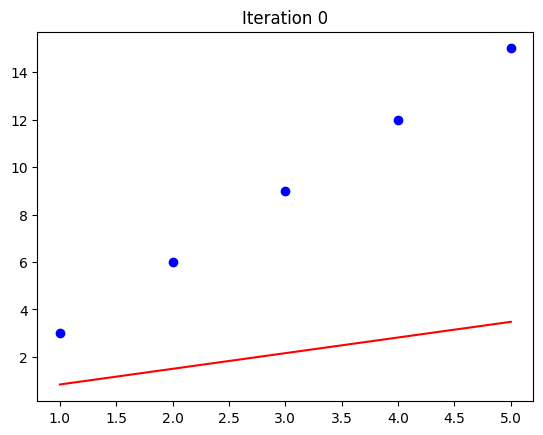

Mean Squared Error: 0.055067460410928276


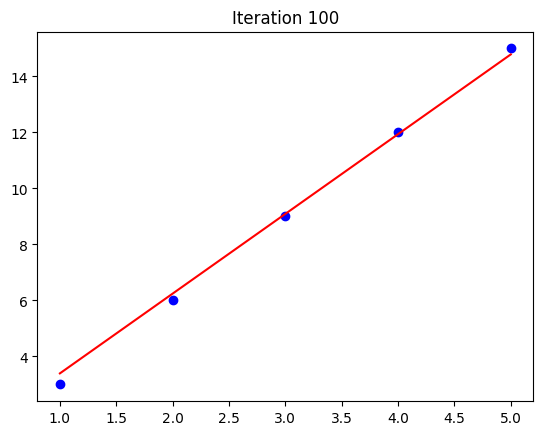

Mean Squared Error: 0.027972472243351778


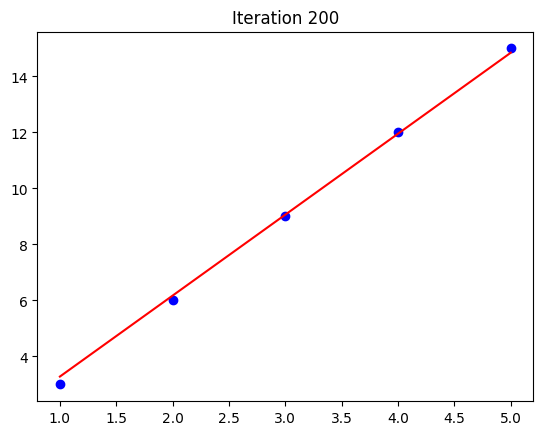

Mean Squared Error: 0.014209102754442822


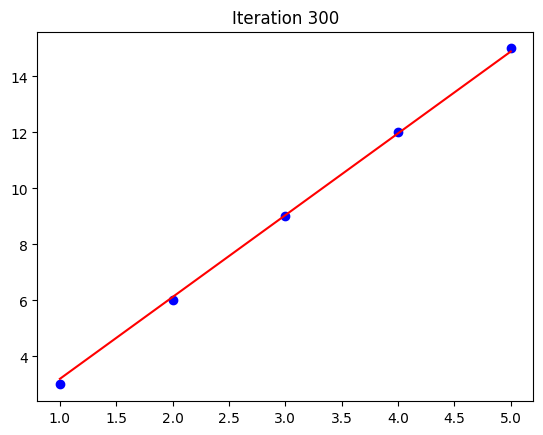

Mean Squared Error: 0.007217760351314638


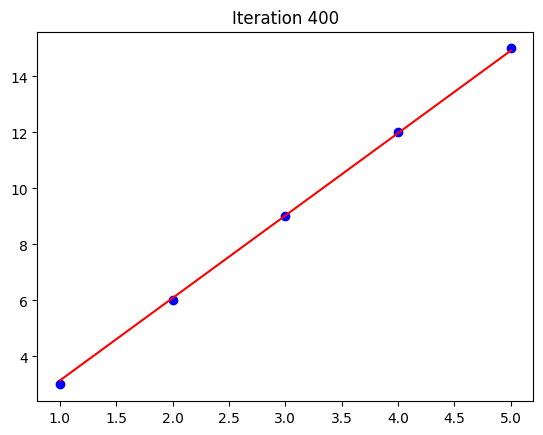

Mean Squared Error: 0.003666386638855145


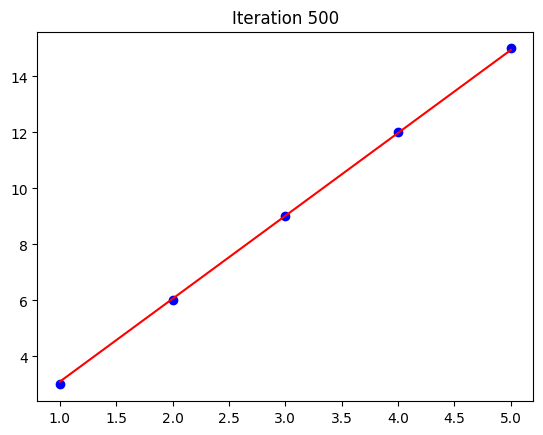

Mean Squared Error: 0.0018624047254668494


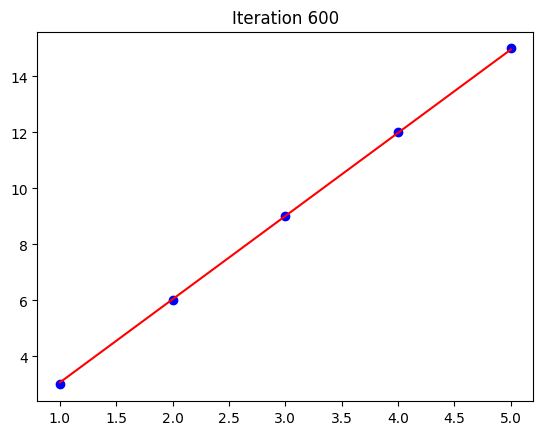

Mean Squared Error: 0.0009460408034119546


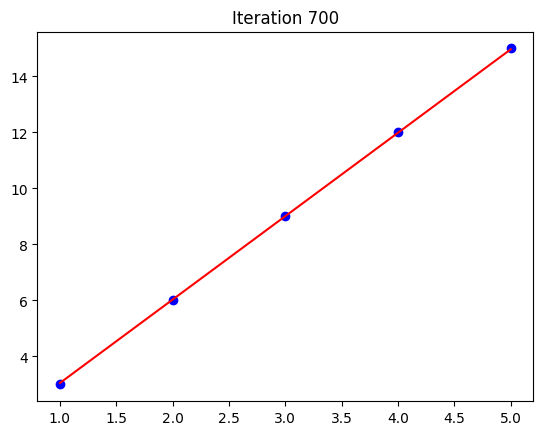

Mean Squared Error: 0.0004805578451783253


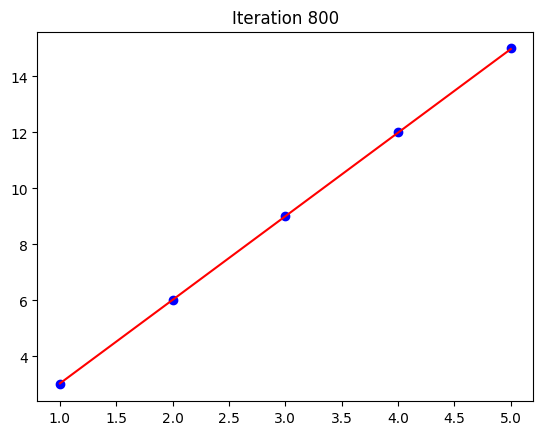

Mean Squared Error: 0.00024410769781764565


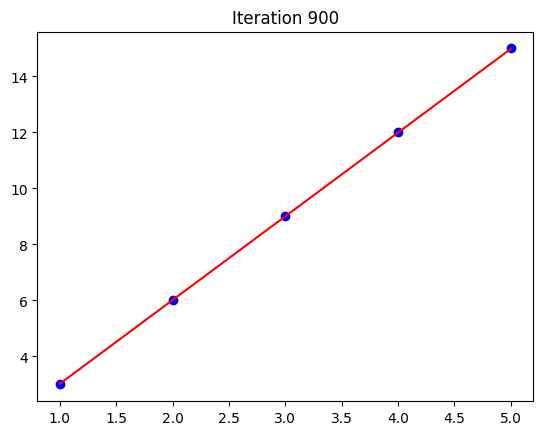

Prediction: [ 7.50802701 10.50079754 13.49356806 16.48633859]
Final weight: 2.9927705260079667
Final bias: 0.026100695010915737
Validator Prediction: [ 7.5 10.5 13.5 16.5]
Validator final weight: [3.]
Validation final bias: -0.00000000000000355271


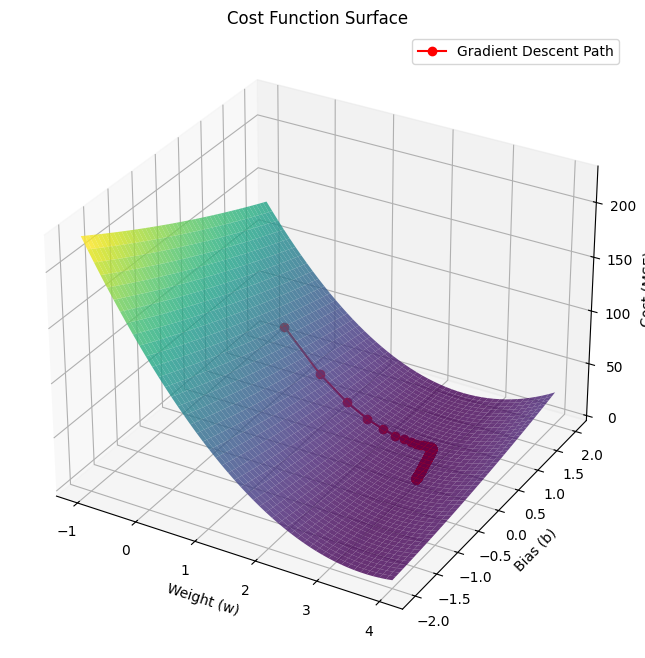

In [14]:
### Implementing my linear regression as a class; validate against sklearn

import numpy as np
from sklearn.linear_model import LinearRegression

class MyLinearRegression:
    def __init__(self, learning_rate=0.01, iterations=100):
        self.learning_rate = learning_rate
        self.iterations = iterations

        # initialize with zero weights
        self.w = 0.0
        self.b = 0.0

        self.cost_history = []
        self.w_history = []
        self.b_history = []

    def fit(self, X, y):
        for i in range(self.iterations):
            # Calculate the mean squared error between y_predicted and y
            MSE = (1/len(X)) * np.sum((y-(self.w*X+self.b))**2)
            print(f'Mean Squared Error: {MSE}') if i % 100 == 0 else None

            # Compute partial derivatives of MSE (cost function) with respect to b
            outer_derivative_b = 2*(y-(self.w*X+self.b)) # derivative of `(y - wX - b)^2`
            inner_derivative_b = -1 # derivative of `y - wX - b` (wrt b)
            gradient_b_components = outer_derivative_b * inner_derivative_b # chain rule
            gradient_b = np.mean(gradient_b_components)

            # Now we can do the same with respect to w
            outer_derivative_w = 2*(y-(self.w*X+self.b))
            inner_derivative_w = -X # # derivative of `y - Xw - b` (wrt w)
            gradient_w_components = outer_derivative_w * inner_derivative_w # chain rule
            gradient_w = np.mean(gradient_w_components)

            self.w = self.w - (self.learning_rate * gradient_w)
            self.b = self.b - (self.learning_rate * gradient_b)

            # Just for visualising the descent down the cost function curve
            self.cost_history.append(MSE)
            self.w_history.append(self.w)
            self.b_history.append(self.b)

            # Just for visualising the movement of the line
            if i % 100 == 0:
                y_pred = (self.w * X) + self.b
                plt.scatter(X, y, color='blue')  # Data points
                plt.plot(X, y_pred, color='red')  # Line of best fit
                plt.title(f'Iteration {i}')
                plt.show()

    def predict(self, X):
        Y = (self.w * X) + self.b
        return Y
    

X = np.array([1, 2, 3, 4, 5]) # input, dependent variable
y = np.array([3, 6, 9, 12, 15]) # target, independent variable

my_model = MyLinearRegression(learning_rate=0.01, iterations=1000)
my_model.fit(X, y)
my_prediction = my_model.predict(np.array([2.5, 3.5, 4.5, 5.5]))

print(f'Prediction: {my_prediction}') # 7.508027010030832
print(f'Final weight: {my_model.w}') # 2.9927705260079667
print(f'Final bias: {my_model.b}') # 0.026100695010915737

validator = LinearRegression(fit_intercept=True)
validator.fit(X.reshape(-1, 1), y)
validator_prediction = validator.predict(np.array([2.5, 3.5, 4.5, 5.5]).reshape(-1, 1))

print(f'Validator Prediction: {validator_prediction}')
print(f'Validator final weight: {validator.coef_}')
print(f'Validation final bias: {validator.intercept_:.20f}')

# Plot the descent down the cost function curve
# Prepare grid for 3D cost function surface
ws = np.linspace(-1, 4, 50)  # Range of weights
bs = np.linspace(-2, 2, 50)  # Range of biases
W, B = np.meshgrid(ws, bs)  # Create a grid of weights and biases
Costs = np.zeros_like(W)

# Compute cost for each (w, b) pair
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        w = W[i, j]
        b = B[i, j]
        y_pred = w * X + b
        Costs[i, j] = np.mean((y - y_pred) ** 2)

# Plot 3D surface
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(W, B, Costs, cmap='viridis', alpha=0.8)
ax.set_xlabel("Weight (w)")
ax.set_ylabel("Bias (b)")
ax.set_zlabel("Cost (MSE)")
ax.set_title("Cost Function Surface")

# Overlay gradient descent trajectory
ax.plot(my_model.w_history, my_model.b_history, my_model.cost_history, color="red", marker="o", label="Gradient Descent Path")
ax.legend()

plt.show()

In [ ]:
from sklearn.linear_model import SGDRegressor

# (sklearn's LinearRegression does not use gradient descent, but rather the normal equation)
# but the SGDRegressor does use (stochastic) gradient descent
sgd_regressor = SGDRegressor(
    max_iter=1000,
    tol=1e-3,
    random_state=42,
    shuffle=False,
    learning_rate='constant',
    eta0=0.01
)
sgd_regressor.fit(X.reshape(-1, 1), y)
sgd_regressor.predict(np.array([[2.5]]))

print("Prediction:", sgd_regressor.predict(np.array([2.5, 3.5, 4.5, 5.5]).reshape(-1, 1)))
print("Weights:", sgd_regressor.coef_)
print("Bias:", sgd_regressor.intercept_)